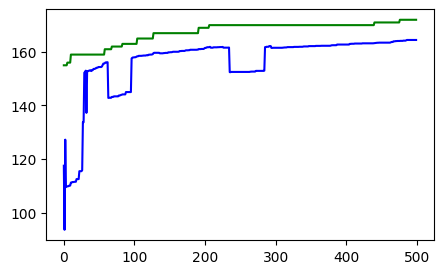

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("save3.csv", sep=';')

plt.figure(figsize=(5,3))
plt.plot(df['epoch'], df['avg'], label='avg', color='blue')
plt.plot(df['epoch'], df['max'], label='max', color='green')

plt.show()

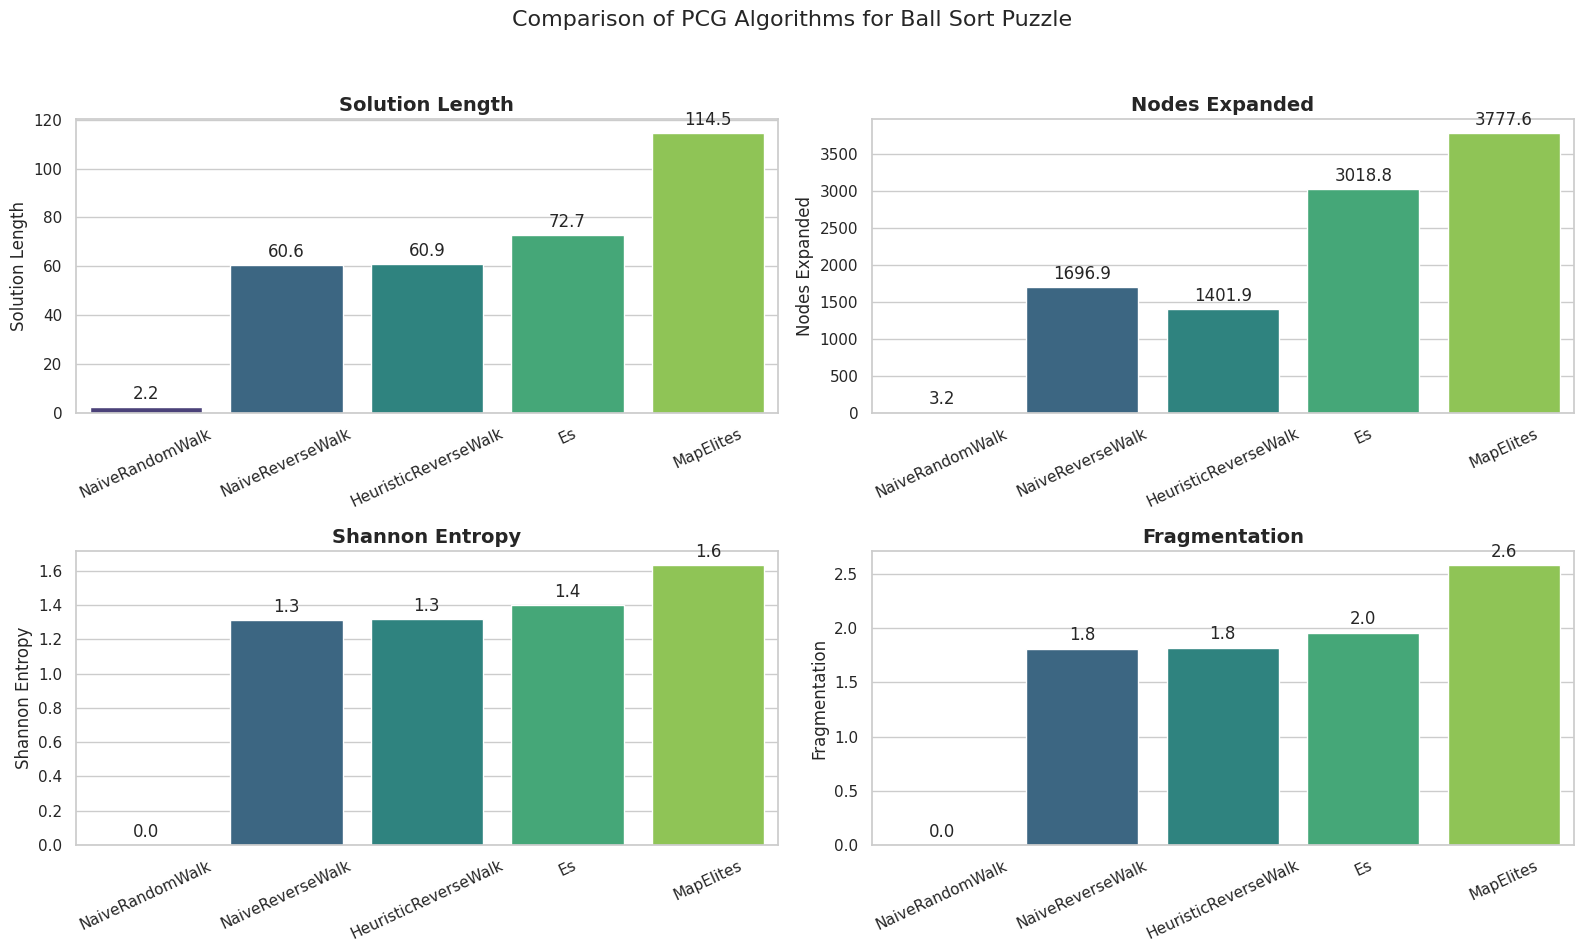

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

csv_data = """id,algorithm,solution length,nodes expanded,shannon entropy,fragmentation
0,NaiveRandomWalk,2.228,3.239,0.0,0.0
1,NaiveReverseWalk,60.573,1696.912,1.3128097267276493,1.8124545454545462
2,HeuristicReverseWalk,60.857,1401.923,1.3203154343997923,1.8221363636363637
3,Es,72.71,3018.79,1.4011186052147622,1.9595454545454547
4,MapElites,114.45833333333333,3777.5833333333335,1.6325335208230518,2.5814393939393936"""

df = pd.read_csv(io.StringIO(csv_data))

df.columns = df.columns.str.strip()

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Comparison of PCG Algorithms for Ball Sort Puzzle', fontsize=16)
metrics = ['solution length', 'nodes expanded', 'shannon entropy', 'fragmentation']
colors = sns.color_palette("viridis", len(df))

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.barplot(x='algorithm', y=metric, data=df, ax=ax, palette='viridis', hue='algorithm', legend=False)
    
    ax.set_title(metric.title(), fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(metric.title())
    ax.tick_params(axis='x', rotation=25)
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', padding=3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig("algorithm_comparison.png", dpi=300)

plt.show()

In [4]:
import pandas as pd
from scipy import stats
import io

csv_data = """id,algorithm,solution length,nodes expanded,shannon entropy,fragmentation
0,NaiveRandomWalk,2.228,3.239,0.0,0.0
1,NaiveReverseWalk,60.573,1696.912,1.3128097267276493,1.8124545454545462
2,HeuristicReverseWalk,60.857,1401.923,1.3203154343997923,1.8221363636363637
3,Es,72.71,3018.79,1.4011186052147622,1.9595454545454547
4,MapElites,114.458,3777.583,1.6325335208230518,2.5814393939393936"""

df = pd.read_csv(io.StringIO(csv_data))

sample_sizes = {
    'NaiveRandomWalk': 1000,
    'NaiveReverseWalk': 1000,
    'HeuristicReverseWalk': 1000,
    'Es': 100,
    'MapElites': 24
}

std_ratio = 0.20
baseline_name = 'NaiveRandomWalk'

def run_custom_ttest(metric):
    baseline_row = df[df['algorithm'] == baseline_name].iloc[0]
    n_base = sample_sizes[baseline_name]
    m_base = baseline_row[metric]
    s_base = m_base * std_ratio
    
    results = []
    
    for _, row in df.iterrows():
        algo = row['algorithm']
        if algo == baseline_name: continue
        
        n_curr = sample_sizes[algo]
        m_curr = row[metric]
        s_curr = m_curr * std_ratio

        t_stat, p_val = stats.ttest_ind_from_stats(
            mean1=m_curr, std1=s_curr, nobs1=n_curr,
            mean2=m_base, std2=s_base, nobs2=n_base,
            equal_var=False 
        )
        
        results.append({
            "Algorithm": algo,
            "n": n_curr,
            "T-stat": round(t_stat, 3),
            "P-value": f"{p_val:.4e}",
            "Sig (0.05)": "Yes" if p_val < 0.05 else "No"
        })
    
    return pd.DataFrame(results)

final_stats = run_custom_ttest('solution length')
print(final_stats.to_markdown(index=False))

| Algorithm            |    n |   T-stat |   P-value | Sig (0.05)   |
|:---------------------|-----:|---------:|----------:|:-------------|
| NaiveReverseWalk     | 1000 |  152.195 | 0         | Yes          |
| HeuristicReverseWalk | 1000 |  152.223 | 0         | Yes          |
| Es                   |  100 |   48.466 | 8.734e-71 | Yes          |
| MapElites            |   24 |   24.018 | 8.634e-18 | Yes          |
